In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import math as m
from scipy.optimize import least_squares
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Cargar datos experimentales de pecho.

In [2]:
xPe, yPe = np.loadtxt("breast_ajuste.txt",delimiter="\t", unpack=True)

Cargar datos experimentales de pulmón

In [3]:
xPu, yPu = np.loadtxt("lung_ajuste.txt",delimiter="\t", unpack=True)

# Estimación de los parámetros del modelo

### Modelo exponencial $V_0=1$

#### Pecho

`ftol` termination condition is satisfied.
Function evaluations 25, initial cost 5.1689e+32, final cost 2.8711e+06, first-order optimality 5.36e+03.
-------------------------------
Parámetros estimados:
[0.20617051 1.        ]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 0.206 ± 0.002
parámetro[1]: 1.000 ± 0.000
-------------------------------------------------


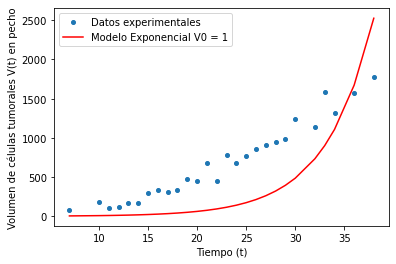

In [4]:
def exponencial_1(p,t):
    return (1*np.exp(p[0]*t))

param_list = []

def residuos(p,t,y):
    y_modelo = exponencial_1(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] 

resE1 = least_squares(residuos, parametros_iniciales, args=(xPe,yPe), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resE1.x)
print('-------------------------------')
print('')

def covarianza(resE1,yPe):
    U, S, V = np.linalg.svd(resE1.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resE1.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resE1.x) # Número de parámetros a estimar
    NMSE = 2*resE1.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resE1,yPe)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resE1.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = exponencial_1(resE1.x, xPe)

plt.figure()
plt.plot(xPe,yPe, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPe, y_modelo, 'r-', label='Modelo Exponencial V0 = 1')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en pecho")
plt.legend(loc='best')
plt.show()

#### Pulmón

`ftol` termination condition is satisfied.
Function evaluations 31, initial cost 3.5827e+20, final cost 1.9575e+06, first-order optimality 1.89e+03.
-------------------------------
Parámetros estimados:
[0.32673208 1.        ]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 0.327 ± 0.003
parámetro[1]: 1.000 ± 0.000
-------------------------------------------------


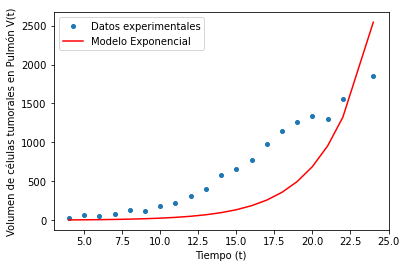

In [5]:
def exponencial_1(p,t):
    return (1*np.exp(p[0]*t))

param_list = []

def residuos(p,t,y):
    y_modelo = exponencial_1(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] #Tantos elementos como parámetros tenga el modelo

resE2 = least_squares(residuos, parametros_iniciales, args=(xPu,yPu), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resE2.x)
print('-------------------------------')
print('')

def covarianza(resE2,yPu):
    U, S, V = np.linalg.svd(resE2.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resE2.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPu) # Número de elementos
    P = len(resE2.x) # Número de parámetros a estimar
    NMSE = 2*resE2.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resE2,yPu)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resE2.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = exponencial_1(resE2.x, xPu)

plt.figure()
plt.plot(xPu,yPu, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPu, y_modelo, 'r-', label='Modelo Exponencial')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales en Pulmón V(t)")
plt.legend(loc='best')
plt.show()

### Modelo exponencial $V_0$

#### Pecho

`ftol` termination condition is satisfied.
Function evaluations 46, initial cost 5.1689e+32, final cost 1.7409e+05, first-order optimality 1.20e+02.
-------------------------------
Parámetros estimados:
[1.06277229e+02 7.61581295e-02]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 106.277 ± 7.289
parámetro[1]: 0.076 ± 0.002
-------------------------------------------------


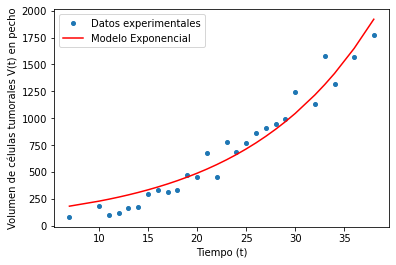

In [6]:
def exponencial(p,t):
    return (p[0]*np.exp(p[1]*t))

param_list = []

def residuos(p,t,y):
    y_modelo = exponencial(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] 

resEV1 = least_squares(residuos, parametros_iniciales, args=(xPe,yPe), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resEV1.x)
print('-------------------------------')
print('')

def covarianza(resEV1,yPe):
    U, S, V = np.linalg.svd(resEV1.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resEV1.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resEV1.x) # Número de parámetros a estimar
    NMSE = 2*resEV1.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resEV1,yPe)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resEV1.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = exponencial(resEV1.x, xPe)

plt.figure()
plt.plot(xPe,yPe, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPe, y_modelo, 'r-', label='Modelo Exponencial')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en pecho")
plt.legend(loc='best')
plt.show()

#### Pulmón

`ftol` termination condition is satisfied.
Function evaluations 32, initial cost 3.5827e+20, final cost 1.6886e+05, first-order optimality 1.15e+02.
-------------------------------
Parámetros estimados:
[81.7713268   0.13430181]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 81.771 ± 8.210
parámetro[1]: 0.134 ± 0.005
-------------------------------------------------


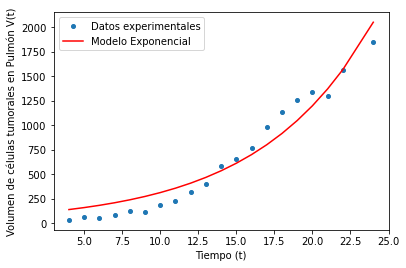

In [7]:
def exponencial(p,t):
    return (p[0]*np.exp(p[1]*t))

param_list = []

def residuos(p,t,y):
    y_modelo = exponencial(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] #Tantos elementos como parámetros tenga el modelo

resEV2 = least_squares(residuos, parametros_iniciales, args=(xPu,yPu), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resEV2.x)
print('-------------------------------')
print('')

def covarianza(resEV2,yPu):
    U, S, V = np.linalg.svd(resEV2.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resEV2.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPu) # Número de elementos
    P = len(resEV2.x) # Número de parámetros a estimar
    NMSE = 2*resEV2.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resEV2,yPu)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resEV2.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = exponencial(resEV2.x, xPu)

plt.figure()
plt.plot(xPu,yPu, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPu, y_modelo, 'r-', label='Modelo Exponencial')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales en Pulmón V(t)")
plt.legend(loc='best')
plt.show()

### Modelo exponencial-lineal con $V_0=1$ 

#### Pecho

Para el ajuste de estos parámetros analizaremos primero los parámetros del exponencial para $V_0 = 1 mm^3$ que ya lo hemos hecho anteriormente, por lo tanto:
    $$a_0 = 0.206 ± 0.002$$.
ara el ajuste del parámetro $a_1$ del **modelo lineal** lo hacemos a continuación. Para este caso $V_0$ es el último valor de V(t) para el cual el crecimiento es exponencial, es decir, en este caso $V_0 = \tau$ 
Siendo la ecuación explícita del **modelo lineal**
$$
V(t) = a_1t+\frac{log(\frac{a_1}{a_0})}{a_0}
$$

In [26]:
def lineal(p,t):
    return p[1]*t+1

param_listL = []


def residuosL(p,t,y):
    param_listL.append(p)
    y_modelo = lineal(p,t)
    return y_modelo - y

parametros_inicialesL =[1,1]

resL = least_squares(residuosL, parametros_inicialesL, args=(xPe,yPe), verbose=1)
#########

def exp(p,t):
    return (1*np.exp(p[0]*t))

param_listE = []

def residuosE(p,t,y):
    param_listE.append(p)
    y_modelo = exp(p,t)
    return y_modelo - y

parametros_inicialesE =[1,1]

resE = least_squares(residuosE, parametros_inicialesE, args=(xPe,yPe), verbose=1)
print('-------------------------------')
print('Parámetros estimados lineal:')
print(resL.x)
print('Parámetros estimados exponencial:')
print(resE.x)
print('-------------------------------')


`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 9.1612e+06, final cost 7.2951e+05, first-order optimality 3.87e-01.
`ftol` termination condition is satisfied.
Function evaluations 25, initial cost 5.1689e+32, final cost 2.8711e+06, first-order optimality 5.36e+03.
-------------------------------
Parámetros estimados lineal:
[ 1.         34.27752236]
Parámetros estimados exponencial:
[0.20617051 1.        ]
-------------------------------


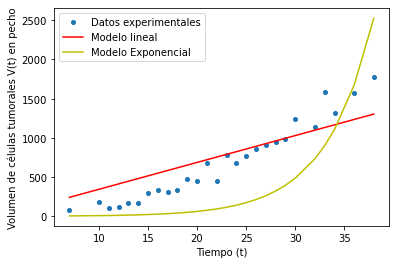

In [25]:

y_modeloL = lineal(resL.x, xPe)
y_modeloE = exp(resE.x, xPe)

plt.figure()
plt.plot(xPe,yPe, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPe, y_modeloL, 'r-', label='Modelo lineal')
plt.plot(xPe, y_modeloE, 'y-', label='Modelo Exponencial ')

plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en pecho")
plt.legend(loc='best')
plt.show()

Calculando el punto de intersección entre ambas rectas obtenemos el valor de $\tau$
Por lo que ahora podemos calcular el ajuste con una función discontinua, en la que para un tiempo por debajo o igual al volumen $\tau$ sera exponencial y por encima del volumen $\tau$ será exponencial.
Haciendo el cálculo igualando las funciones:
$$
V(t) = 1e^{a_0t}
$$
$$
V(t) = a_1t+1
$$
$$
1e^{a_0t} = a_1t+1
$$
$$
t = \frac{ln(a_1t+1)}{a_0}
$$

Introduciendo los valores obtenidos de las variables $a_0$ y $a_1$ en el ajuste obtenemos que el tiempo en el que obtenemos el valor de $\tau$ es $t=34$ día, por lo que, si lo buscamos en el archivo de datos $\tau = 1321.5991328857144$

In [27]:
def lineal(p,t):
    return p[1]*t+1321.599

param_listL = []

def residuosL(p,t,y):
    param_listL.append(p)
    y_modeloL = lineal(p,t)
    return y_modeloL - y

parametros_inicialesL = [1,1]

resL1 = least_squares(residuosL, parametros_inicialesL, args=(xPe[25:],yPe[25:]), verbose=1)
print('-------------------------------')
print('Parámetros estimados lineal:')
print(resL1.x)
print('-------------------------------')
print('')


#########

def exp(p,t):
    return (1*np.exp(p[0]*t))

param_listE = []

def residuosE(p,t,y):
    param_listE.append(p)
    y_modeloE = exp(p,t)
    return y_modeloE - y

parametros_inicialesE = [1,1]

resE1 = least_squares(residuosE, parametros_inicialesE, args=(xPe[1:25],yPe[1:25]), verbose=1)
print('-------------------------------')
print('Parámetros estimados exponencial:')
print(resE1.x)
print('-------------------------------')
print('')

def covarianza(resL1,yPe):
    U, S, V = np.linalg.svd(resL1.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resL1.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcovL1 = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resL1.x) # Número de parámetros a estimar
    NMSE = 2*resL1.cost/(I-P) #estimación a posteriori de σ2
    
    pcovL1 = pcovL1 * NMSE
    return pcovL1


pcovL1 = covarianza(resL1,yPe)

nseL1 = np.sqrt(np.diag(pcovL1))


def covarianza(resE1,yPe):
    U, S, V = np.linalg.svd(resL1.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resL1.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcovE1 = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resE1.x) # Número de parámetros a estimar
    NMSE = 2*resE1.cost/(I-P) #estimación a posteriori de σ2
    
    pcovE1 = pcovE1 * NMSE
    return pcovE1


pcovE1 = covarianza(resE1,yPe)

nseE1 = np.sqrt(np.diag(pcovE1))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resL1.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nseL1[i]/2))

    
for i,param in enumerate(resE1.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nseE1[i]/2))
print('-------------------------------------------------')


`ftol` termination condition is satisfied.
Function evaluations 21, initial cost 1.0727e+05, final cost 8.7180e+03, first-order optimality 1.06e-01.
-------------------------------
Parámetros estimados lineal:
[1.         9.48174239]
-------------------------------

`ftol` termination condition is satisfied.
Function evaluations 31, initial cost 1.9643e+29, final cost 1.7105e+06, first-order optimality 3.34e+03.
-------------------------------
Parámetros estimados exponencial:
[0.22285493 1.        ]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 1.000 ± 0.000
parámetro[1]: 9.482 ± 0.252
parámetro[0]: 0.223 ± 0.000
parámetro[1]: 1.000 ± 3.533
-------------------------------------------------


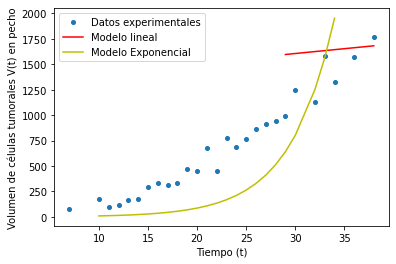

In [28]:
y_modeloL = lineal(resL1.x, xPe[20:])
y_modeloE = exp(resE1.x, xPe[1:25])

plt.figure()
plt.plot(xPe,yPe, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPe[20:], y_modeloL, 'r-', label='Modelo lineal')
plt.plot(xPe[1:25], y_modeloE, 'y-', label='Modelo Exponencial ')

plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en pecho")
plt.legend(loc='best')
plt.show()

#### Pulmón

In [29]:
def lineal(p,t):
    return p[1]*t+1

param_listL = []


def residuosL(p,t,y):
    param_listL.append(p)
    y_modeloL = lineal(p,t)
    return y_modeloL - y

parametros_inicialesL =[1,1]

resL = least_squares(residuosL, parametros_inicialesL, args=(xPu,yPu), verbose=1)
print('-------------------------------')
print('Parámetros estimados lineal:')
print(resL.x)
print('-------------------------------')
print('')


#########

def exp(p,t):
    return (1*np.exp(p[0]*t))

param_listE = []

def residuosE(p,t,y):
    param_listE.append(p)
    y_modeloE = exp(p,t)
    return y_modeloE - y

parametros_inicialesE =[1,1]

resE = least_squares(residuosE, parametros_inicialesE, args=(xPu,yPu), verbose=1)
print('-------------------------------')
print('Parámetros estimados exponencial:')
print(resE.x)
print('-------------------------------')
print('')


`ftol` termination condition is satisfied.
Function evaluations 25, initial cost 7.2227e+06, final cost 8.0925e+05, first-order optimality 2.15e+00.
-------------------------------
Parámetros estimados lineal:
[ 1.         55.25801584]
-------------------------------

`ftol` termination condition is satisfied.
Function evaluations 31, initial cost 3.5827e+20, final cost 1.9575e+06, first-order optimality 1.89e+03.
-------------------------------
Parámetros estimados exponencial:
[0.32673208 1.        ]
-------------------------------



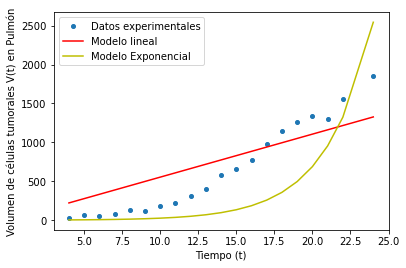

In [30]:
y_modeloL = lineal(resL.x, xPu)
y_modeloE = exp(resE.x, xPu)

plt.figure()
plt.plot(xPu,yPu, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPu, y_modeloL, 'r-', label='Modelo lineal')
plt.plot(xPu, y_modeloE, 'y-', label='Modelo Exponencial ')

plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en Pulmón")
plt.legend(loc='best')
plt.show()

Calculando el punto de intersección entre ambas rectas obtenemos el valor de $\tau$
Por lo que ahora podemos calcular el ajuste con una función discontinua, en la que para un tiempo por debajo o igual al volumen $\tau$ sera exponencial y por encima del volumen $\tau$ será exponencial.
Haciendo el cálculo igualando las funciones:
$$
V(t) = 1e^{a_0t}
$$
$$
V(t) = a_1t+1
$$
$$
1e^{a_0t} = a_1t+1
$$
$$
t = \frac{ln(a_1t+1)}{a_0}
$$

Introduciendo los valores obtenidos de las variables $a_0$ y $a_1$ en el ajuste obtenemos que el tiempo en el que obtenemos el valor de $\tau$ es $t=17$ día, por lo que, si lo buscamos en el archivo de datos $\tau = 978.3614265550007$

In [31]:
def lineal(p,t):
    return p[1]*t+978.3614

param_listL = []

def residuosL(p,t,y):
    param_listL.append(p)
    y_modeloL = lineal(p,t)
    return y_modeloL - y

parametros_inicialesL = [1,1]

resL2 = least_squares(residuosL, parametros_inicialesL, args=(xPe[14:],yPe[14:]), verbose=1)
print('-------------------------------')
print('Parámetros estimados lineal:')
print(resL2.x)
print('-------------------------------')
print('')


#########

def exp(p,t):
    return (1*np.exp(p[0]*t))

param_listE = []

def residuosE(p,t,y):
    param_listE.append(p)
    y_modeloE = exp(p,t)
    return y_modeloE - y

parametros_inicialesE = [1,1]

resE2 = least_squares(residuosE, parametros_inicialesE, args=(xPe[1:14],yPe[1:14]), verbose=1)
print('-------------------------------')
print('Parámetros estimados exponencial:')
print(resE2.x)
print('-------------------------------')
print('')




def covarianza(resL2,yPe):
    U, S, V = np.linalg.svd(resL2.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resL2.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcovL2 = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resL2.x) # Número de parámetros a estimar
    NMSE = 2*resL2.cost/(I-P) #estimación a posteriori de σ2
    
    pcovL2 = pcovL2 * NMSE
    return pcovL2


pcovL2 = covarianza(resL2,yPe)

nseL2 = np.sqrt(np.diag(pcovL2))



def covarianza(resE2,yPe):
    U, S, V = np.linalg.svd(resE2.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resE2.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcovE2 = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resE2.x) # Número de parámetros a estimar
    NMSE = 2*resE2.cost/(I-P) #estimación a posteriori de σ2
    
    pcovE2 = pcovE2 * NMSE
    return pcovE2


pcovE2 = covarianza(resE2,yPe)

nseE2 = np.sqrt(np.diag(pcovE2))


print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resL2.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nseL2[i]/2))
    
for i,param in enumerate(resE2.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nseE2[i]/2))

print('-------------------------------------------------')

`ftol` termination condition is satisfied.
Function evaluations 19, initial cost 8.0502e+05, final cost 6.4218e+05, first-order optimality 3.95e+00.
-------------------------------
Parámetros estimados lineal:
[1.         6.28258484]
-------------------------------

`ftol` termination condition is satisfied.
Function evaluations 37, initial cost 7.4315e+18, final cost 1.5716e+05, first-order optimality 8.91e+01.
-------------------------------
Parámetros estimados exponencial:
[0.30017147 1.        ]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 1.000 ± 0.000
parámetro[1]: 6.283 ± 1.049
parámetro[0]: 0.300 ± 0.002
parámetro[1]: 1.000 ± 0.000
-------------------------------------------------


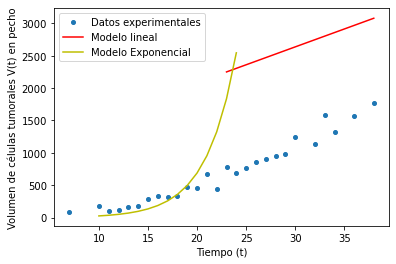

In [32]:
y_modeloL = lineal(resL.x, xPe[14:])
y_modeloE = exp(resE.x, xPe[1:16])

plt.figure()
plt.plot(xPe,yPe, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPe[14:], y_modeloL, 'r-', label='Modelo lineal')
plt.plot(xPe[1:16], y_modeloE, 'y-', label='Modelo Exponencial ')

plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en pecho")
plt.legend(loc='best')
plt.show()

### Modelo logístico

#### Pecho

`ftol` termination condition is satisfied.
Function evaluations 23, initial cost 9.6756e+06, final cost 3.4065e+05, first-order optimality 3.20e+02.
-------------------------------
Parámetros estimados:
[3.0247716e-01 1.4792782e+03]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 0.302 ± 0.004
parámetro[1]: 1479.278 ± 41.680
-------------------------------------------------


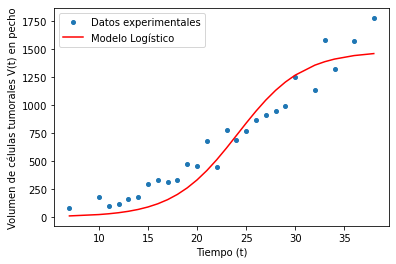

In [12]:
def modelo_logistico(p,t):
    return (p[1]*1*np.exp(p[0]*t))/(p[1]+1*np.exp(p[0]*t)-1)

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_logistico(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] 

resLO1 = least_squares(residuos, parametros_iniciales, args=(xPe,yPe), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resLO1.x)
print('-------------------------------')
print('')

def covarianza(resLO1,yPe):
    U, S, V = np.linalg.svd(resLO1.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resLO1.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resLO1.x) # Número de parámetros a estimar
    NMSE = 2*resLO1.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resLO1,yPe)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resLO1.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = modelo_logistico(resLO1.x, xPe)

plt.figure()
plt.plot(xPe,yPe, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPe, y_modelo, 'r-', label='Modelo Logístico')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en pecho")
plt.legend(loc='best')
plt.show()

#### Pulmón

`ftol` termination condition is satisfied.
Function evaluations 24, initial cost 7.4613e+06, final cost 8.6910e+04, first-order optimality 6.22e+01.
-------------------------------
Parámetros estimados:
[4.62182286e-01 1.63769373e+03]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 0.462 ± 0.004
parámetro[1]: 1637.694 ± 32.475
-------------------------------------------------


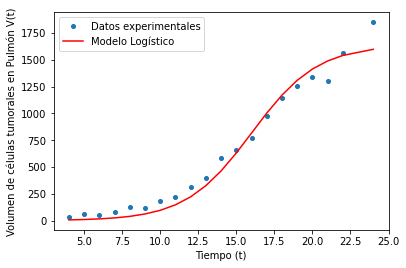

In [13]:
def modelo_logistico(p,t):
    return (p[1]*1*np.exp(p[0]*t))/(p[1]+1*np.exp(p[0]*t)-1)

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_logistico(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] #Tantos elementos como parámetros tenga el modelo

resLO2 = least_squares(residuos, parametros_iniciales, args=(xPu,yPu), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resLO2.x)
print('-------------------------------')
print('')

def covarianza(resLO2,yPu):
    U, S, V = np.linalg.svd(resLO2.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resLO2.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPu) # Número de elementos
    P = len(resLO2.x) # Número de parámetros a estimar
    NMSE = 2*resLO2.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resLO2,yPu)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resLO2.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = modelo_logistico(resLO2.x, xPu)

plt.figure()
plt.plot(xPu,yPu, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPu, y_modelo, 'r-', label='Modelo Logístico')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales en Pulmón V(t)")
plt.legend(loc='best')
plt.show()

### Modelo logístico generalizado

#### Pecho

The maximum number of function evaluations is exceeded.
Function evaluations 300, initial cost 9.6756e+06, final cost 1.0770e+05, first-order optimality 1.35e+07.
-------------------------------
Parámetros estimados:
[6.36218975e+01 1.19948536e-03 2.58573730e+03]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 63.622 ± 3831.845
parámetro[1]: 0.001 ± 0.072
parámetro[2]: 2585.737 ± 340.933
-------------------------------------------------


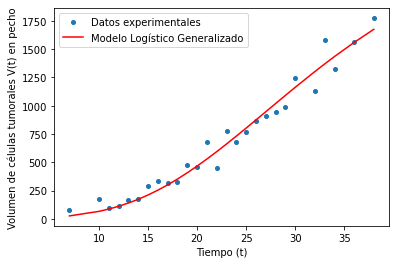

In [14]:
np.seterr(all='ignore')
def modelo_lgeneralizado(p,t):
    return((p[2])/((1**p[1]+(p[2]**p[1]-1**p[1])*(1/np.exp(p[0]*p[1]*t)))**(1/p[1])))

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_lgeneralizado(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1,1] 

resLG1 = least_squares(residuos, parametros_iniciales, args=(xPe,yPe), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resLG1.x)
print('-------------------------------')
print('')

def covarianza(resLG1,yPe):
    U, S, V = np.linalg.svd(resLG1.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resLG1.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resLG1.x) # Número de parámetros a estimar
    NMSE = 2*resLG1.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resLG1,yPe)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resLG1.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = modelo_lgeneralizado(resLG1.x, xPe)

plt.figure()
plt.plot(xPe,yPe, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPe, y_modelo, 'r-', label='Modelo Logístico Generalizado')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en pecho")
plt.legend(loc='best')
plt.show()

#### Pulmón

`ftol` termination condition is satisfied.
Function evaluations 83, initial cost 7.4613e+06, final cost 2.4533e+04, first-order optimality 1.29e+00.
-------------------------------
Parámetros estimados:
[1.05534129e+00 1.43891125e-01 2.59840918e+03]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 1.055 ± 0.251
parámetro[1]: 0.144 ± 0.049
parámetro[2]: 2598.409 ± 188.900
-------------------------------------------------


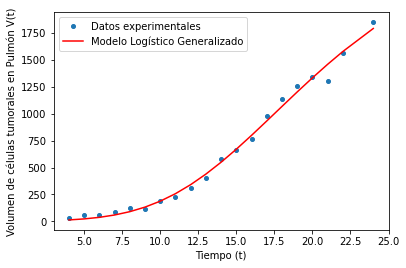

In [15]:

def modelo_lgeneralizado(p,t):
    return((p[2])/((1**p[1]+(p[2]**p[1]-1**p[1])*np.exp(-p[0]*p[1]*t))**(1/p[1])))

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_lgeneralizado(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1,1] #Tantos elementos como parámetros tenga el modelo

resLG2 = least_squares(residuos, parametros_iniciales, args=(xPu,yPu), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resLG2.x)
print('-------------------------------')
print('')

def covarianza(resLG2,yPu):
    U, S, V = np.linalg.svd(resLG2.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resLG2.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPu) # Número de elementos
    P = len(resLG2.x) # Número de parámetros a estimar
    NMSE = 2*resLG2.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resLG2,yPu)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resLG2.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = modelo_lgeneralizado(resLG2.x, xPu)

plt.figure()
plt.plot(xPu,yPu, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPu, y_modelo, 'r-', label='Modelo Logístico Generalizado')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales en Pulmón V(t)")
plt.legend(loc='best')
plt.show()

### Modelo de Gompertz

#### Pecho

`ftol` termination condition is satisfied.
Function evaluations 18, initial cost 9.6435e+06, final cost 1.0754e+05, first-order optimality 1.63e+01.
-------------------------------
Parámetros estimados:
[0.59679943 0.07586584]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 0.597 ± 0.010
parámetro[1]: 0.076 ± 0.002
-------------------------------------------------


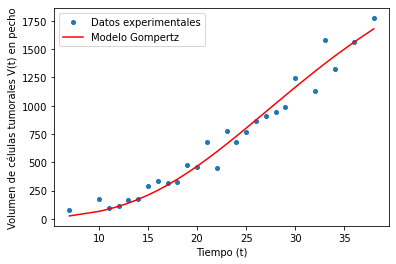

In [16]:
def modelo_gompertz(p,t):
    return 1*np.exp((p[0]/p[1])*(1-np.exp(-p[1]*t)))


param_list = []

def residuos(p,t,y):
    y_modelo = modelo_gompertz(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] 

resGO1 = least_squares(residuos, parametros_iniciales, args=(xPe,yPe), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resGO1.x)
print('-------------------------------')
print('')

def covarianza(resGO1,yPe):
    U, S, V = np.linalg.svd(resGO1.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resGO1.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resGO1.x) # Número de parámetros a estimar
    NMSE = 2*resGO1.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resGO1,yPe)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resGO1.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = modelo_gompertz(resGO1.x, xPe)

plt.figure()
plt.plot(xPe,yPe, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPe, y_modelo, 'r-', label='Modelo Gompertz')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en pecho")
plt.legend(loc='best')
plt.show()

#### Pulmón

`ftol` termination condition is satisfied.
Function evaluations 19, initial cost 7.4390e+06, final cost 2.7316e+04, first-order optimality 9.98e+00.
-------------------------------
Parámetros estimados:
[0.87447517 0.10761251]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 0.874 ± 0.010
parámetro[1]: 0.108 ± 0.002
-------------------------------------------------


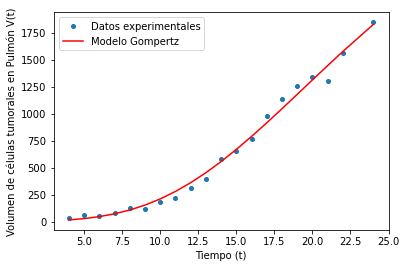

In [17]:
def modelo_gompertz(p,t):
    return 1*np.exp((p[0]/p[1])*(1-np.exp(-p[1]*t)))

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_gompertz(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] #Tantos elementos como parámetros tenga el modelo

resGO2 = least_squares(residuos, parametros_iniciales, args=(xPu,yPu), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resGO2.x)
print('-------------------------------')
print('')

def covarianza(resGO2,yPu):
    U, S, V = np.linalg.svd(resGO2.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resGO2.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPu) # Número de elementos
    P = len(resGO2.x) # Número de parámetros a estimar
    NMSE = 2*resGO2.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resGO2,yPu)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resGO2.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = modelo_gompertz(resGO2.x, xPu)

plt.figure()
plt.plot(xPu,yPu, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPu, y_modelo, 'r-', label='Modelo Gompertz')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales en Pulmón V(t)")
plt.legend(loc='best')
plt.show()

### Modelo Von Bertalanffy

#### Pecho

`ftol` termination condition is satisfied.
Function evaluations 60, initial cost 9.6756e+06, final cost 9.1486e+04, first-order optimality 3.10e-02.
-------------------------------
Parámetros estimados:
[1.21623552 0.08818008 0.70547482]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 1.216 ± 0.172
parámetro[1]: 0.088 ± 0.064
parámetro[2]: 0.705 ± 0.079
-------------------------------------------------


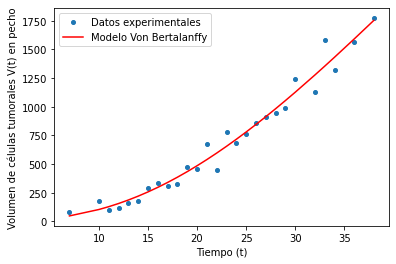

In [18]:
def modelo_Bertalanffy(p,t):
    return ((p[0]/p[1])+(1**(1-p[2])-(p[0]/p[1]))*np.exp((-p[1])*t*(1-p[2])))**(1/(1-p[2]))

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_Bertalanffy(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1,0.9] 

resVB1 = least_squares(residuos, parametros_iniciales, args=(xPe,yPe), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resVB1.x)
print('-------------------------------')
print('')

def covarianza(resVB1,yPe):
    U, S, V = np.linalg.svd(resVB1.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resVB1.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resVB1.x) # Número de parámetros a estimar
    NMSE = 2*resVB1.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resVB1,yPe)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resVB1.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = modelo_Bertalanffy(resVB1.x, xPe)

plt.figure()
plt.plot(xPe,yPe, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPe, y_modelo, 'r-', label='Modelo Von Bertalanffy')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en pecho")
plt.legend(loc='best')
plt.show()

#### Pulmón

The maximum number of function evaluations is exceeded.
Function evaluations 300, initial cost 9.3714e+09, final cost 2.7522e+04, first-order optimality 2.17e+06.
-------------------------------
Parámetros estimados:
[21.08055748 20.19866129  0.99474941]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 21.081 ± 202.722
parámetro[1]: 20.199 ± 202.797
parámetro[2]: 0.995 ± 0.052
-------------------------------------------------


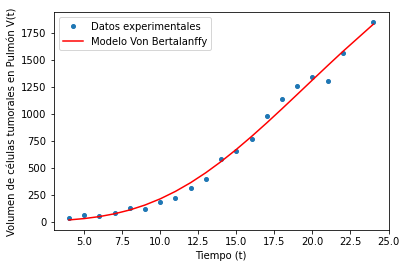

In [19]:
def modelo_Bertalanffy(p,t):
    return (p[0]/p[1]+(1**(1-p[2])-(p[0]/p[1]))*np.exp(-p[1]*(1-p[2])*t))**(1/(1-p[2]))

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_Bertalanffy(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales= [7.5,6.5,0.99] #Tantos elementos como parámetros tenga el modelo

resVB2 = least_squares(residuos, parametros_iniciales, args=(xPu,yPu), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resVB2.x)
print('-------------------------------')
print('')

def covarianza(resVB2, yPu):
    U, S, V = np.linalg.svd(resVB2.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resVB2.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPu) # Número de elementos
    P = len(resVB2.x) # Número de parámetros a estimar
    NMSE = 2*resVB2.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resVB2,yPu)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resVB2.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = modelo_Bertalanffy(resVB2.x, xPu)

plt.figure()
plt.plot(xPu,yPu, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPu, y_modelo, 'r-', label='Modelo Von Bertalanffy')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales en Pulmón V(t)")
plt.legend(loc='best')
plt.show()

### Modelo Power Law

#### Pecho

`ftol` termination condition is satisfied.
Function evaluations 23, initial cost 3.8880e+13, final cost 9.5566e+04, first-order optimality 5.19e-01.
-------------------------------
Parámetros estimados:
[0.52563465 1.88441852]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 0.526 ± 0.013
parámetro[1]: 1.884 ± 0.127
-------------------------------------------------


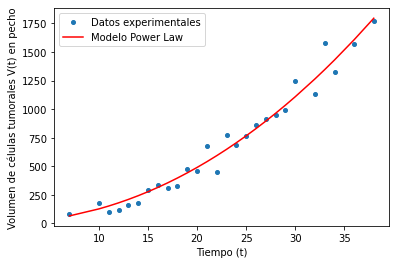

In [20]:
def modelo_Power_law(p,t):
    return ((p[0]*(1**(1-p[0]))-(1**(1-p[0]))-p[1]*t*(p[0]-1)**2)/(p[0]-1))**(-1/(p[0]-1))

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_Power_law(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[0.9,1] 

resPL1 = least_squares(residuos, parametros_iniciales, args=(xPe,yPe), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resPL1.x)
print('-------------------------------')
print('')

def covarianza(resPL1,yPe):
    U, S, V = np.linalg.svd(resPL1.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resPL1.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPe) # Número de elementos
    P = len(resPL1.x) # Número de parámetros a estimar
    NMSE = 2*resPL1.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resPL1,yPe)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resPL1.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = modelo_Power_law(resPL1.x, xPe)

plt.figure()
plt.plot(xPe,yPe, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPe, y_modelo, 'r-', label='Modelo Power Law')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t) en pecho")
plt.legend(loc='best')
plt.show()

#### Pulmón

`ftol` termination condition is satisfied.
Function evaluations 18, initial cost 3.3597e+10, final cost 5.9698e+04, first-order optimality 1.49e+01.
-------------------------------
Parámetros estimados:
[0.59149133 2.14318724]
-------------------------------

-------------------------------------------------
Parámetros con sus errores estandar normalizados:
parámetro[0]: 0.591 ± 0.012
parámetro[1]: 2.143 ± 0.137
-------------------------------------------------


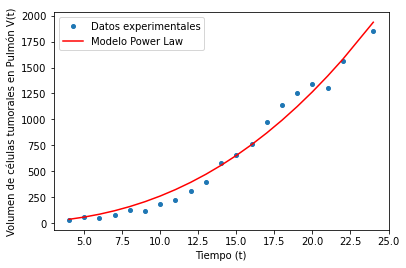

In [21]:
def modelo_Power_law(p,t):
    return ((p[0]*(1**(1-p[0]))-(1**(1-p[0]))-p[1]*t*(p[0]-1)**2)/(p[0]-1))**(-1/(p[0]-1))

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_Power_law(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[0.9,1] #Tantos elementos como parámetros tenga el modelo

resPL2 = least_squares(residuos, parametros_iniciales, args=(xPu,yPu), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
print(resPL2.x)
print('-------------------------------')
print('')

def covarianza(resPL2, yPu):
    U, S, V = np.linalg.svd(resPL2.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(resPL2.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)
    
    
    I = len(yPu) # Número de elementos
    P = len(resPL2.x) # Número de parámetros a estimar
    NMSE = 2*resPL2.cost/(I-P) #estimación a posteriori de σ2
    
    pcov = pcov * NMSE
    return pcov


pcov = covarianza(resPL2,yPu)

nse = np.sqrt(np.diag(pcov))

print('-------------------------------------------------')
print('Parámetros con sus errores estandar normalizados:')

for i,param in enumerate(resPL2.x):
    print('parámetro[{:d}]: {:5.3f} ± {:5.3f}'.format(i,param,nse[i]/2))
print('-------------------------------------------------')


y_modelo = modelo_Power_law(resPL2.x, xPu)

plt.figure()
plt.plot(xPu,yPu, 'o', markersize=4, label='Datos experimentales')
plt.plot(xPu, y_modelo, 'r-', label='Modelo Power Law')
plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales en Pulmón V(t)")
plt.legend(loc='best')
plt.show()

## Distribución de residuos

#### Pecho

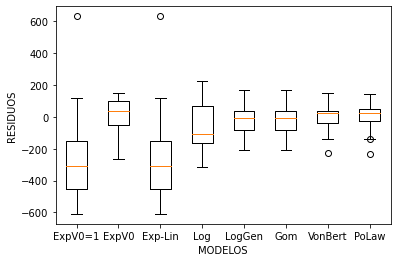

In [22]:
x = [resE1.fun, resEV1.fun, resE1.fun, resLO1.fun, resLG1.fun, resGO1.fun, resVB1.fun, resPL1.fun]
plt.boxplot(x)
plt.xlabel('MODELOS')
plt.ylabel('RESIDUOS')
plt.xticks([1,2,3,4,5,6,7,8], ['ExpV0=1', 'ExpV0', 'Exp-Lin', 'Log', 'LogGen', 'Gom', 'VonBert', 'PoLaw'])
plt.savefig('DistResiduosPecho.jpg')
plt.show()

#### Pulmón

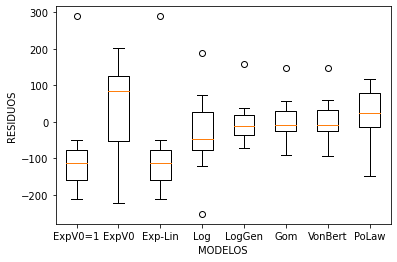

In [23]:
x = [resE2.fun, resEV2.fun, resE2.fun, resLO2.fun, resLG2.fun, resGO2.fun, resVB2.fun, resPL2.fun]
plt.boxplot(x)
plt.xlabel('MODELOS')
plt.ylabel('RESIDUOS')
plt.xticks([1,2,3,4,5,6,7,8], ['ExpV0=1', 'ExpV0', 'Exp-Lin', 'Log', 'LogGen', 'Gom', 'VonBert', 'PoLaw'])
plt.savefig('DistResiduosPulmon.jpg')
plt.show()